# **Capstone project 2**    - **Yes Bank Stock Closing Price Prediction**
















##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**    - Mohd Suhel


# **Project Summary -**

The Yes Bank Monthly Closing Price Prediction Capstone Project aims to predict the monthly closing price of Yes Bank's stock using historical stock market data. The project uses various machine learning algorithms to analyze and predict the stock price.

The first step in the project is data preprocessing, where the historical stock market data is collected and cleaned. The dataset contains the stock price for each month along with various financial indicators like the opening price, closing price etc.

Next step Visuization part, this part visualize our data or preprocessed data. because visualize is more understandable. 

Next, the data is split into training and testing sets, and various machine learning models are trained on the training set. The models used in this project include Linear Regression, Lasso Regression and Elastic Net Regression.

Once the models are trained, they are evaluated on the testing set using various evaluation metrics like Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-Squared (R2) score. The model with the lowest RMSE and MAE and the highest R2 score is selected as the final model.

Finally, the selected model is used to predict the monthly closing price for the next months, and the results are visualized using various charts and graphs.

# **GitHub Link -**

https://github.com/mohd-suhel/Yes-Bank-Stock-Closing-Price-Prediction

# **Problem Statement**


**To determine the future price of YES BANK's stock price which is being traded on National Stock Exchange by making machine learning models. We have to build models which helps us to predict the future stock closing price.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

# import libraries for data munging
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
from datetime import *

# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

# import libraries for remove warning
import warnings
warnings.filterwarnings('ignore')

# import libraries for scalling values
from sklearn.preprocessing import MinMaxScaler

# import libraries for Base model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# import libraries for Cross-validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# import libraries for evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



### Dataset Loading

In [2]:
# mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [122]:
# Load Dataset
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data_YesBank_StockPrices.csv')


### Dataset First View

In [123]:
# Dataset First Look
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [124]:
#First row of dataset
data.iloc[0]

Date     Jul-05
Open       13.0
High       14.0
Low       11.25
Close     12.46
Name: 0, dtype: object

In [125]:
# Dataset Rows & Columns count
data.shape

(185, 5)

**data.shape** tells us that our dataset have 185 rows and 5 columns

### Dataset Information

In [126]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [127]:
# Dataset Duplicate Value Count
data[data.duplicated()].count()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

There is no duplicated row

#### Missing Values/Null Values

In [128]:
# Missing Values/Null Values Count
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

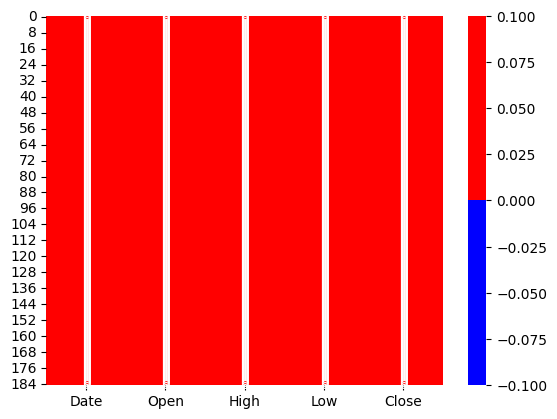

In [129]:
# Visualizing the missing values
sns.heatmap(data.isnull(),cbar=True,annot=True,cmap=['Blue','red'])

No missing value

### What did you know about your dataset?

In this dataset, we have been provided with month wise data of Opening Price, Highest Price, Lowest Price, Closing Price. We have total of 185 rows and 5 columns. The time period of Data is from July 2005 to November 2020.

We have no duplicate, missing or null values in this dataset.

## ***2. Understanding Your Variables***

In [130]:
# Dataset Columns
data.columns.tolist()


['Date', 'Open', 'High', 'Low', 'Close']

In [131]:
# Dataset Describe
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

There are 5 variable in data as follows

Independent Variable

**Date** : It has Month and Year.

**Open** : Opening stock price for respective Month.

**High** : Highest sotck price for respective Month.

**Low** : Lowest stock price for respective Month.

Dependent Variable .

**Close** : Closing price of Stock for respective Month




We have total of 185 rows, containing Open Price, High Price, Low Price, Close Price.

The lowest price YES BANK stock price touched is 5.55

The highest price YES BANK stock price touched is 404.00




### Check Unique Values for each variable.

In [132]:
# Check Unique Values for each variable.
for i in data.columns.to_list():
  print('Unique value of column',i,'is',data[i].nunique())

Unique value of column Date is 185
Unique value of column Open is 183
Unique value of column High is 184
Unique value of column Low is 183
Unique value of column Close is 185


count unique value of every column

## 3. ***Data Wrangling***

In [133]:
# Write your code to make your dataset analysis ready.
#data copy to another variable
ds=data.copy()



In [134]:
#Date column change string format to date-time object

ds['Date'] = pd.to_datetime(ds['Date'].apply(lambda x:datetime.strptime(x,'%b-%y')))


In [135]:
#Extract Year column 
ds['Year'] = ds['Date'].apply(lambda x: x.strftime('%Y')) 

#Extract Month column 
ds['Month'] =ds['Date'].apply(lambda x: x.strftime('%B')) 


In [136]:
#Date column set as index
ds.set_index('Date',inplace=True)


In [137]:
#mean of Open value of every month
month_open_mean=ds.groupby(['Month'])["Open"].mean()
month_open_mean.sort_values(ascending =False).reset_index()

,Month,Open
0,May,114.589333
1,June,113.268000
2,April,113.044000
3,February,109.134667
4,August,108.481875
5,March,108.150667
6,July,103.891250
7,September,103.691875
8,January,100.928000
9,December,100.850000


In [138]:
#mean of Low value of every month
month_low_mean=ds.groupby(['Month'])["Low"].mean()
month_low_mean.sort_values(ascending =False).reset_index()

,Month,Low
0,June,102.642000
1,May,102.404667
2,April,102.284667
3,March,98.524000
4,February,98.238667
5,July,96.206250
6,August,95.777500
7,January,93.766000
8,December,92.808000
9,November,87.251875


In [139]:
#mean of High value of every month
month_high_mean=ds.groupby(['Month'])["High"].mean()
month_high_mean.sort_values(ascending =False).reset_index()

,Month,High
0,April,125.709333
1,March,123.670667
2,May,122.090000
3,June,118.471333
4,July,117.493750
5,January,117.346667
6,August,116.064375
7,February,116.035333
8,September,114.283750
9,October,109.928125


In [140]:
#mean of Close value of every month
month_close_mean=ds.groupby(['Month'])["Close"].mean()
month_close_mean.sort_values(ascending =False).reset_index()

,Month,Close
0,April,114.450000
1,March,113.014000
2,May,112.874667
3,June,109.661333
4,January,108.774667
5,July,108.322500
6,February,107.760667
7,August,103.386875
8,December,100.724000
9,October,97.399375


In [141]:
data.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [142]:
dd=data.drop(columns=['Date','Close'],axis=1)

### What all manipulations have you done and insights you found?

I found in EDA parts-

I Formatted and data type of date feature changed into datetime.





Mean value of Open,Low,High prices according to month :-

Column **Open** :-
```
Highest Price mean - 114.5
Highest Price month - May

Lowest Price mean - 93.8
Lowest Price month - October 

```

Column **Low** :-
```
Highest Price mean - 102.6
Highest Price month - June

Lowest Price mean - 85.3
Lowest Price month - October 

```

Column **High** :-
```
Highest Price mean - 125.7
Highest Price month - April

Lowest Price mean - 105.6
Lowest Price month - November

```

AND 

Column **Close** :-
```
Highest Price mean - 114.4
Highest Price month - April

Lowest Price mean - 93.3
Lowest Price month - September
```


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***




#### Chart - 1 - Closing Price (Univariate)

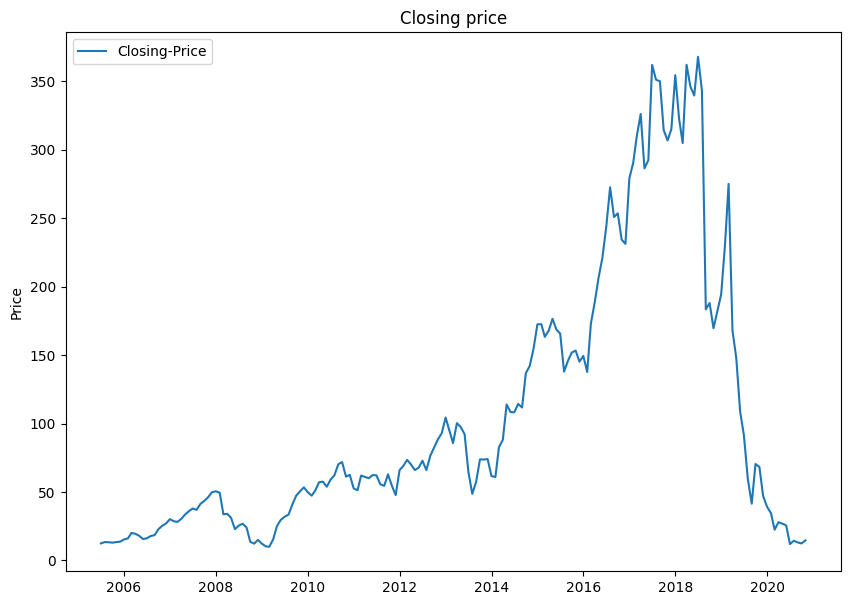

In [143]:
# Chart - 1 visualization code
#plotting of close price

plt.figure(figsize=(10,7))
plt.plot(ds['Close'])
plt.legend(['Closing-Price'])
plt.ylabel('Price')
plt.title('Closing price')
plt.show()

##### 1. Why did you pick the specific chart?

This chart gives us a clear understanding and visualization of closing price from July 2005 till November 2020.



##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that there was a good price rise from July 2005 till 2018 and it was a good time to invest as there was a up trend. The price between 5 Rs - 10 Rs in around July 2005 and reached a peak price of above 350 Rs in the year 2018.

After Rana Kapoor fraud which was done in 2018 the stock price started to fall and there was a severe down trend, in around 2020 the price reached its July 2005 rate of around 5 Rs - 10 Rs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, the insights can help in creating a positive business impact, as we can see the up trend in the stock price from July 2005 to 2018 which was a beneficial time for the investor and after Rana Kapoor fraud there was downtrend in the stock price.

#### Chart - 2 - Open, high, low price(Multi-variate)

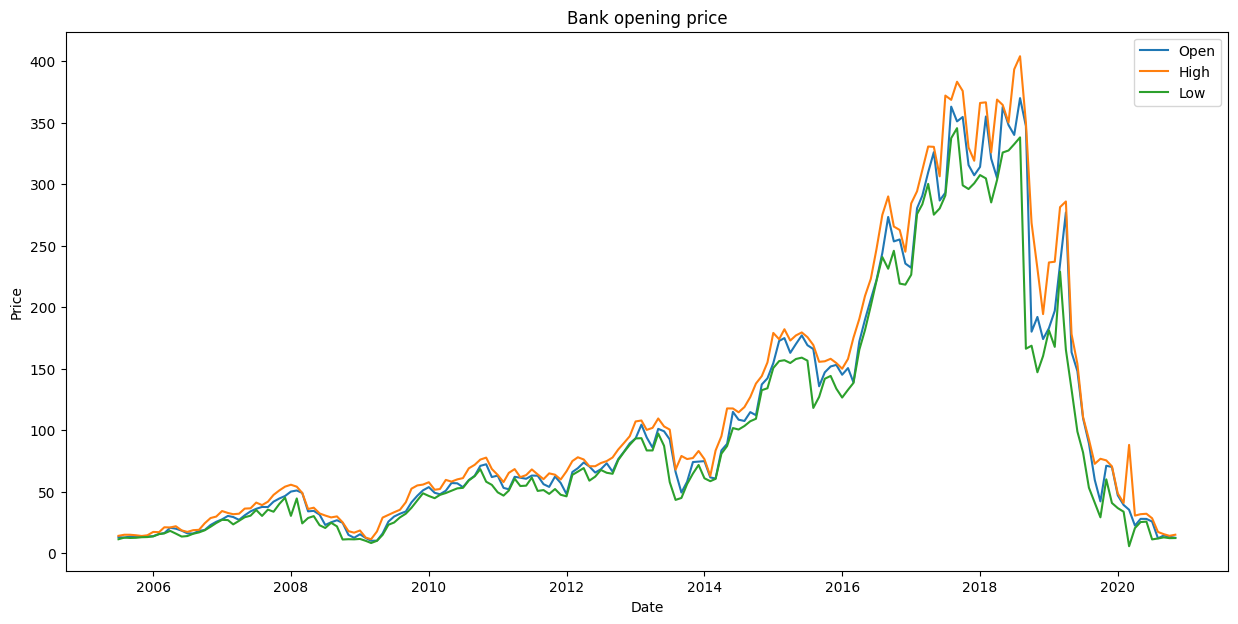

In [144]:
# Chart - 2 visualization code
#plotting of Open, high, low price

plt.figure(figsize=(15,7))
plt.plot(ds['Open'])
plt.plot(ds['High'])
plt.plot(ds['Low'])
plt.legend(['Open',"High",'Low'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bank opening price')
plt.show()

##### 1. Why did you pick the specific chart?

This chart gives us a clear uderstanding and visualization of our independent variables open,high and low price from July 2005 till November 2020.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that there was a good price rise from July 2005 till 2018 and it was a good time to invest as there was a up trend. The price between 5 Rs - 10 Rs in around July 2005 and reached a peak price of above 350 Rs in the year 2018.

After Rana Kapoor fraud which was done in 2018 the stock price started to fall and there wa a severe down trend, in around 2020 the price reached its July 2005 rate of around 5 Rs - 10 Rs.

##### 3. Will the gained insights help creating a positive business impact? 

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help in creating a positive business impact, as we can see the up trend in the stock price from July 2005 to 2018 which was a beneficial time for the investor and after Rana Kapoor fraud there was downtrend in the stock price.

#### Chart - 3 Open vs Close Price (Bivariate)

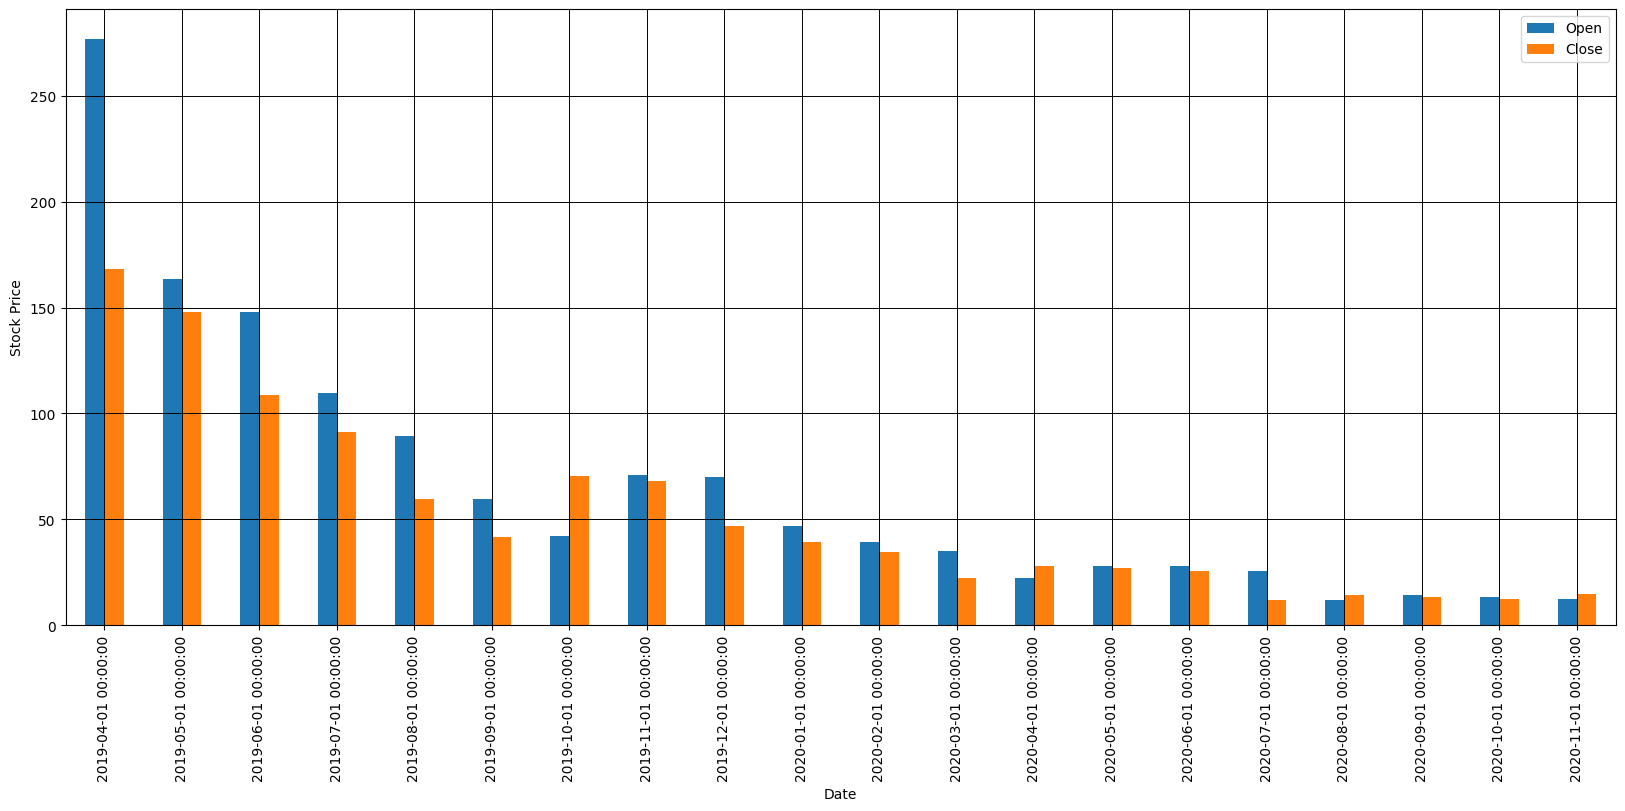

In [145]:
# Chart - 3 visualization code
# Plotting bar open vs close price 

ds[['Open','Close']].tail(20).plot(kind='bar',figsize=(20,8))
plt.grid(which='major',linewidth='0.7', color='black')
plt.ylabel("Stock Price")
plt.show()

##### 1. Why did you pick the specific chart?

The above chart shows a clear relation between the opening price and closing price.

Blue bar indicates opening price of that month, orange bar indicates closing price of that month.

##### 2. What is/are the insight(s) found from the chart?

From the above chart i found ,after 2018 opening and closing price decreases.

I mean yes bank share price decreased after 2018 and price was about 20 rupees.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help in creating a positive business impact, as we can see the up trend in the stock price from July 2005 to 2018 which was a beneficial time for the investor and after Rana Kapoor fraud there was downtrend in the stock price.

#### Chart - 4 - Box and dist plot of Low Price (Univariate)

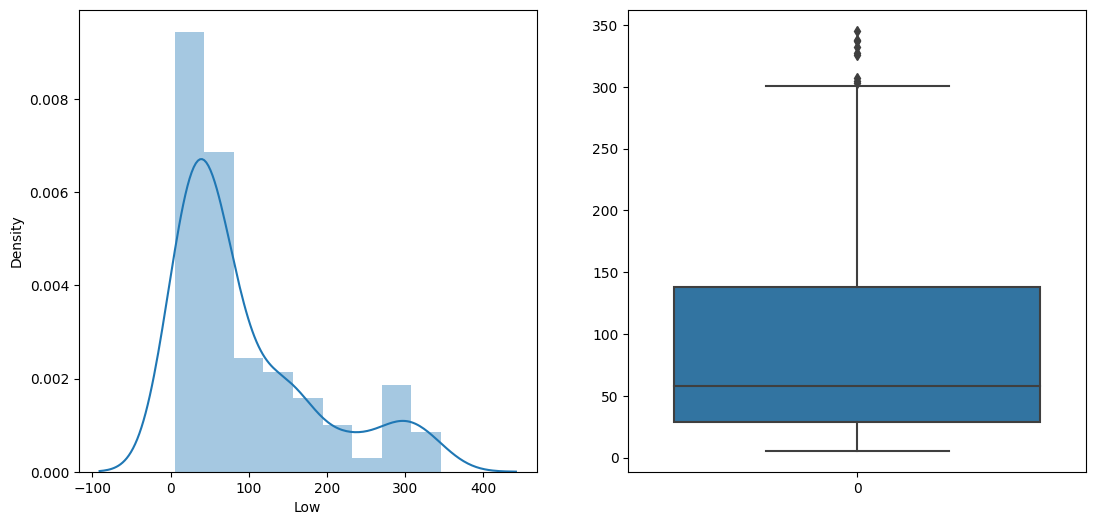

In [146]:
# Chart - 4 visualization code
#Boxplot and dist plot of column Low for determine Outliers and Skewness

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
fig = sns.distplot(data['Low'])
fig.set_xlabel('Low')

plt.subplot(1,2,2)
fig = sns.boxplot(data['Low'])


##### 1. Why did you pick the specific chart?

Above chart was picked for better understanding of the density distribution visualisation of the lowest price of the month and Visulazing outliers.



##### 2. What is/are the insight(s) found from the chart?

By understanding the above chart we can say that density of YES BANK stock low price is at highest between 5Rs to 60Rs price range and the density keeps reducing after 100Rs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by understanding the density of low price of YES BANK stock price we can say that the chances of stock price closing between 5Rs to 60Rs is high and the chances of stock price closing higher than 100Rs is less

#### Chart - 5 - Box and dist plot of Open Price (Univariate)

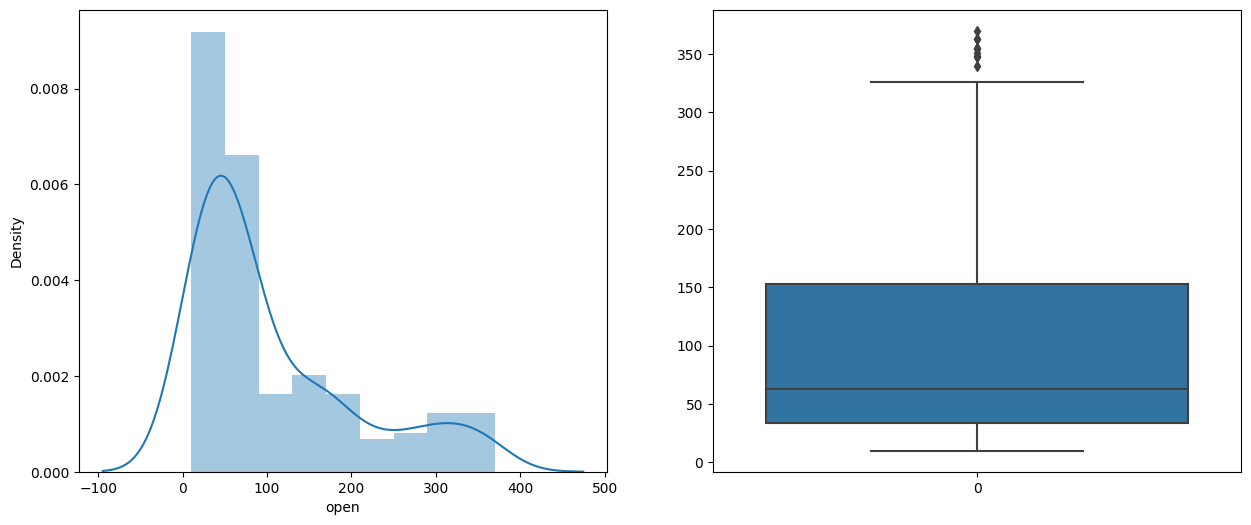

In [147]:
# Chart - 5 visualization code
#Boxplot and dist plot of column Open for determine Outliers and Skewness


plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(data['Open'])
fig.set_xlabel('open')

plt.subplot(1, 2, 2)
fig = sns.boxplot(data['Open'])

##### 1. Why did you pick the specific chart?

Above chart was picked for density visualisation of the opening price and Visulazing outliers.



##### 2. What is/are the insight(s) found from the chart?

By understanding the density chart we can say that opening price was mostly in the range of 40Rs to 150Rs wit the peak at around 60Rs The outliers are around 350Rs price range

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, understanding the density chart can help in creating a positive business impact, we can say that the stock in was around 40Rs to 150Rs most of the time and this could have been a good time to invest and was in 350Rs just a few times, so selling the stock at 350Rs range can be a good idea

#### Chart - 6 - Box and dist plot of High Price (Univariate)

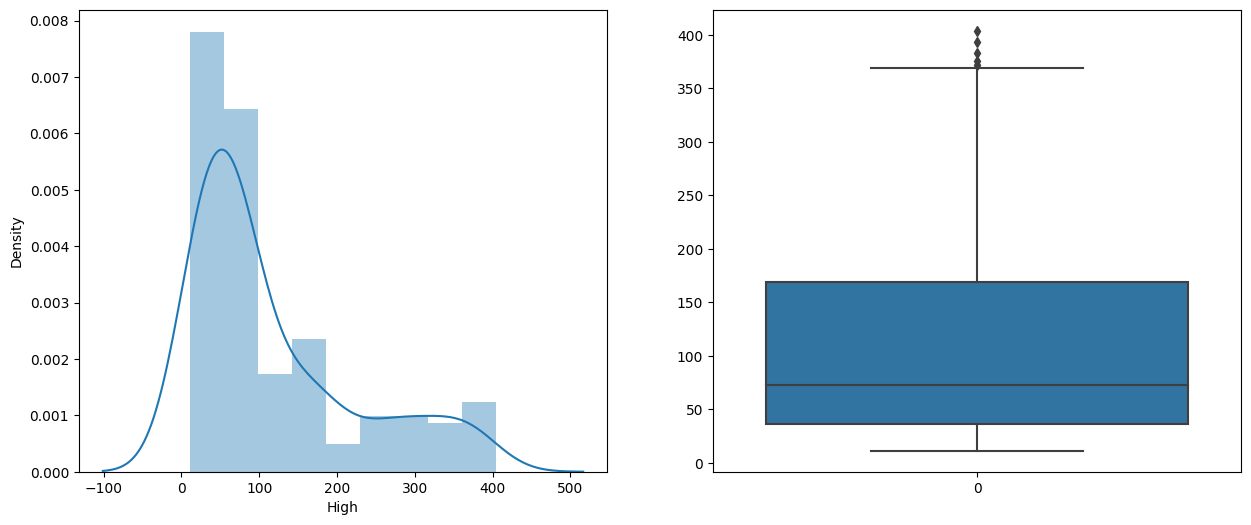

In [148]:
# Chart - 6 visualization code
#Boxplot and dist plot of column High for determine Outliers and Skewness


plt.figure(figsize=(15,6))
plt.subplot(1, 2,1)
fig = sns.distplot(data['High'])
fig.set_xlabel('High')

plt.subplot(1, 2, 2)
fig = sns.boxplot(data['High'])

##### 1. Why did you pick the specific chart?

Above chart was picked for better understanding of the density distribution visualisation of the highest price of the month and Visulazing outliers.



##### 2. What is/are the insight(s) found from the chart?

By understanding the above chart we can say that density of YES BANK stock high price is at highest between 50Rs to 160Rs price range and the density keeps reducing after 80Rs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by understanding the density of high price of YES BANK stock price we can say that the chances of stock price reaching high between 5Rs to 60Rs is high and the chances of stock price closing higher than 100Rs is less



#### Chart - 7 - Box and dist plot of Close Price (Univariate)

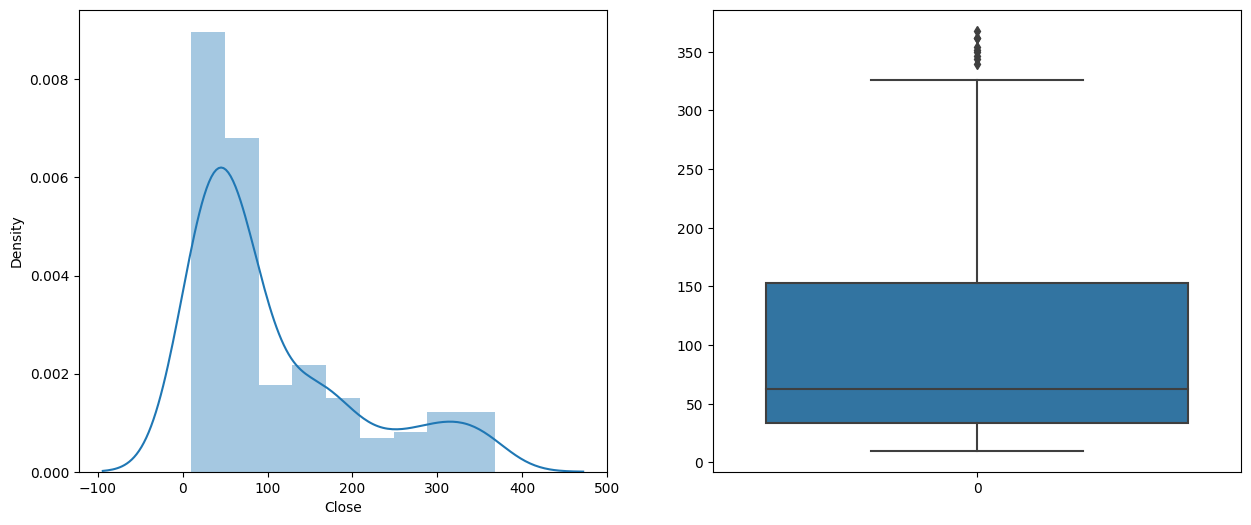

In [149]:
# Chart - 7 visualization code
#Boxplot and dist plot of column Close for determine Outliers and Skewness


plt.figure(figsize=(15,6))
plt.subplot(1, 2,1)
fig = sns.distplot(data['Close'])
fig.set_xlabel('Close')

plt.subplot(1, 2, 2)
fig = sns.boxplot(data['Close'])


  

##### 1. Why did you pick the specific chart?

Above chart was picked for better understanding of the density distribution visualisation of the close price of the month and Visulazing outliers.



##### 2. What is/are the insight(s) found from the chart?

By understanding the above chart we can say that density of YES BANK stock high price is at highest between 5Rs to 60Rs price range and the median is 60Rs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by understanding the density of closing price of YES BANK stock price we can say that the chances of stock price reaching high between 5Rs to 60Rs is high and the chances of stock price closing higher than 100Rs is less



#### Chart - 8 - Box and dist plot of int colums (Multivariate)

In [150]:
# All Numerical Columns
int_col=ds.describe(include=['float64']).columns.tolist()
int_col

['Open', 'High', 'Low', 'Close']

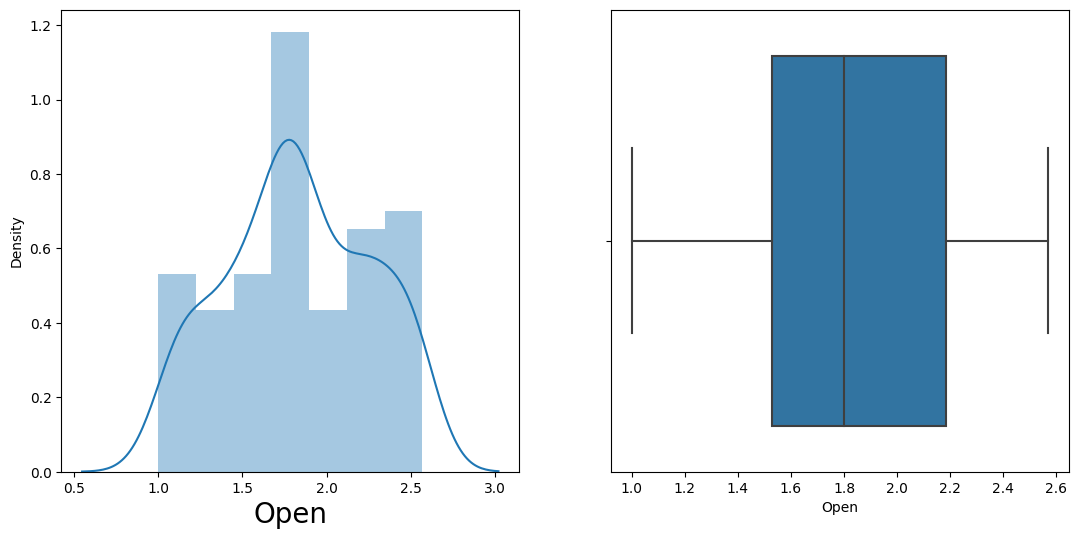

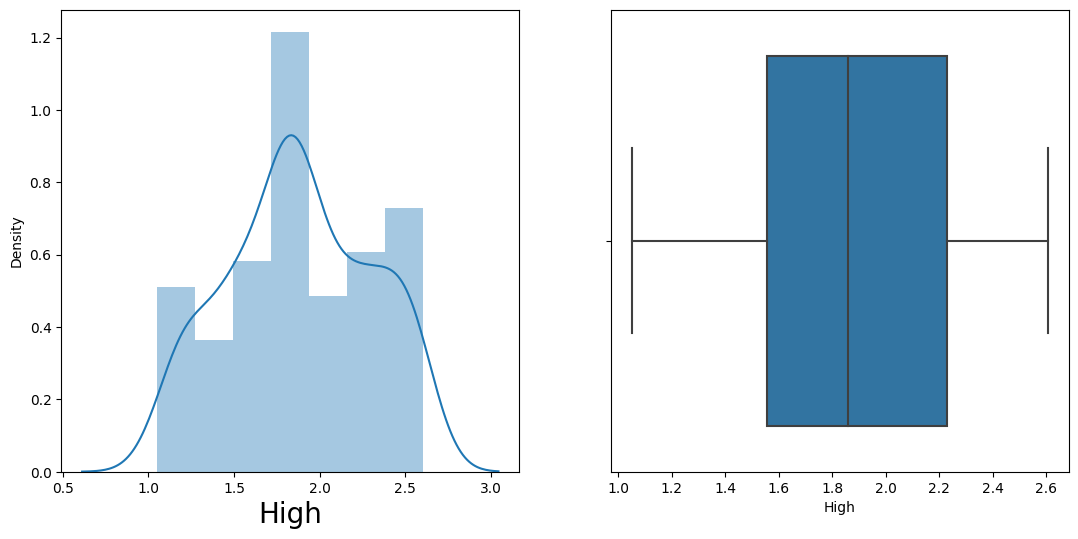

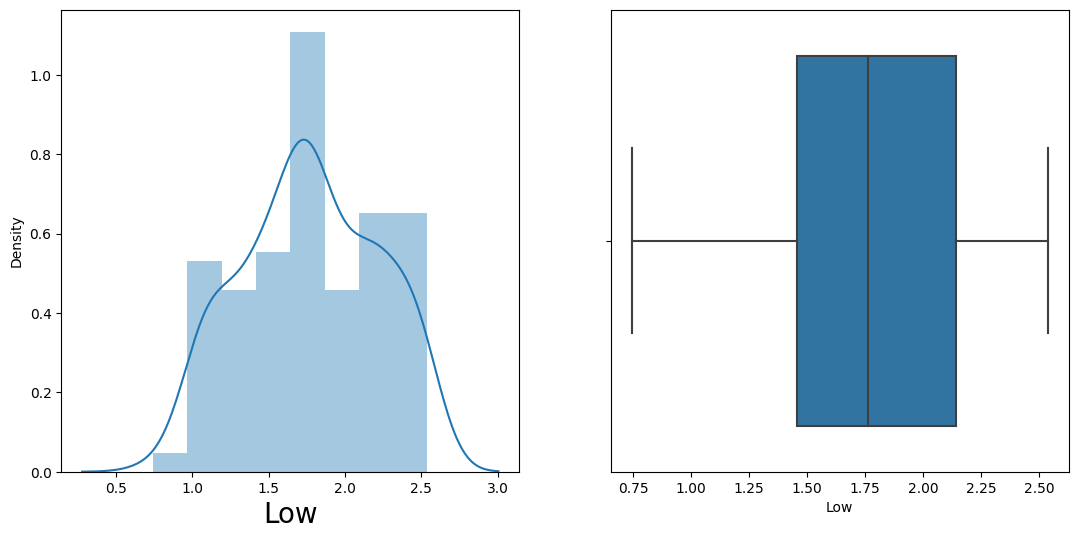

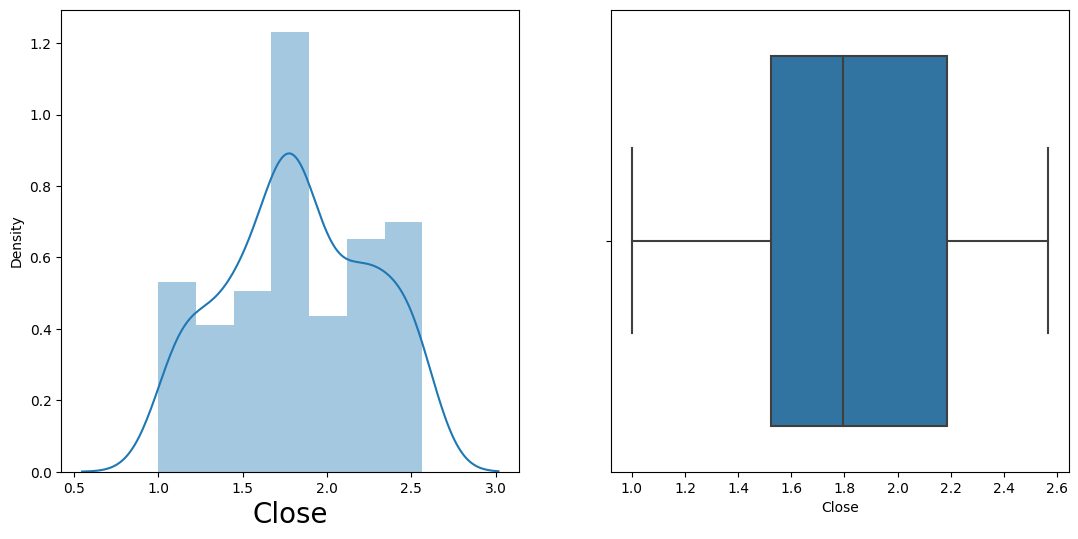

In [151]:
# Chart - 8 visualization code
#Boxplot and dist plot of all columns for removed Skewness

for column in int_col:
  plt.figure(figsize=(13,6))
  plt.subplot(1,2,1)
  fig = sns.distplot(np.log10(ds[column]))
  fig.set_xlabel(column,fontsize=20)
  
  plt.subplot(1,2,2)
  fig = sns.boxplot(x=np.log10(data[column]))
  


##### 1. Why did you pick the specific chart?

Above chart was picked for better understanding of the density distribution visualisation of the log distribution open, low, high, close price of the month and Visulazing outliers.


##### 2. What is/are the insight(s) found from the chart?

This charts show that our data variable's distplot and box plot when we performed log base 10 transformation for remove skewness. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

no, it just remove skewness.

#### Chart - 9

In [152]:
int_col

['Open', 'High', 'Low', 'Close']

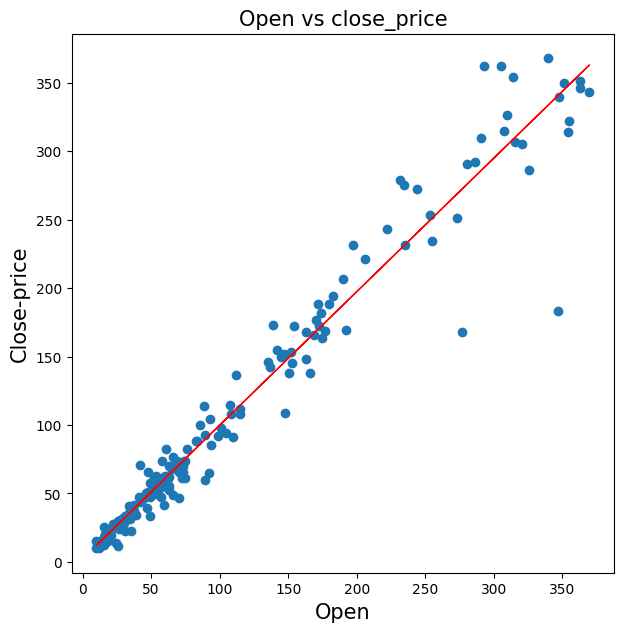

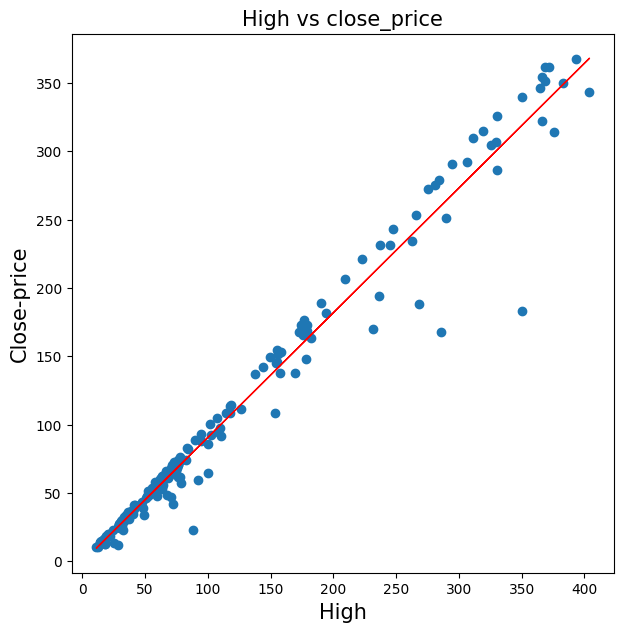

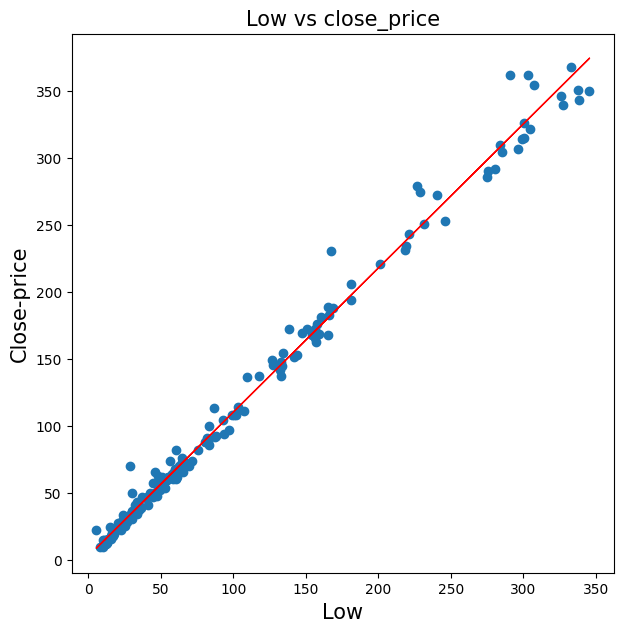

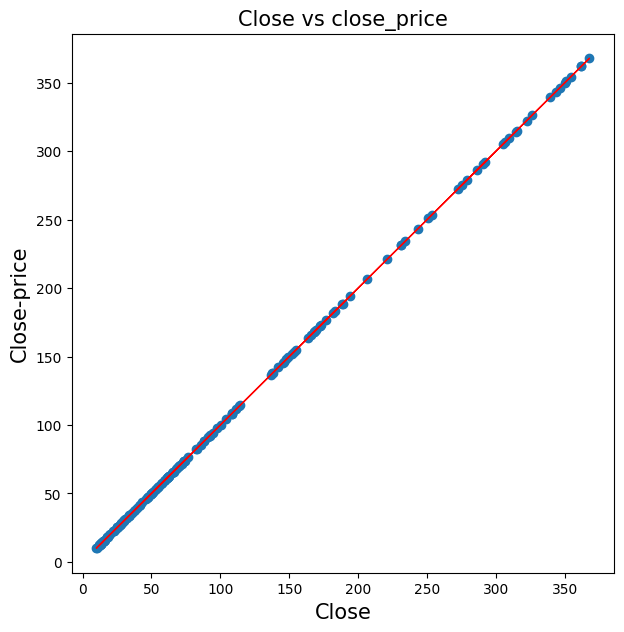

In [153]:
# Chart - 9 visualization code
for i in int_col:
  ax=plt.figure(figsize=(7,7)).gca()
  plt.scatter(x=data[i],y=data['Close'])
  plt.xlabel(i,fontsize=15)
  plt.ylabel('Close-price',fontsize=15)
  plt.title(i +' vs close_price',fontsize=15)

  z = np.polyfit(data[i], data['Close'],deg=1)
  y = np.poly1d(z)(data[i])

  plt.plot(data[i], y,'red',lw=1)

##### 1. Why did you pick the specific chart?

Close-Open,
Close-High and Close- Low Here we selected 3 charts to understand the correlation between Close price and Open price, Close price and High price, Close price and Low price

##### 2. What is/are the insight(s) found from the chart?

All three charts show a positive correlation. Close-Open chart has a correlation of 0.9779 Close-High chart has a correlation of 0.9850 Close-Low chart has a correlation of 0.9953 The chances of stock price closing at low are higher than compared to opening price

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, gained insights can help with creating a positive business impact

We can say that Close-Low chart has the highest correlation of 0.9953, followed by Close-High chart has a correlation of 0.9850 and least is Close-Open chart has a correlation of 0.9779, if we would like to determine the closing price we can go by selecting the low price correlation as chances of stock price closing at low price is highest.

#### Chart - 14 - Correlation Heatmap

<Axes: >

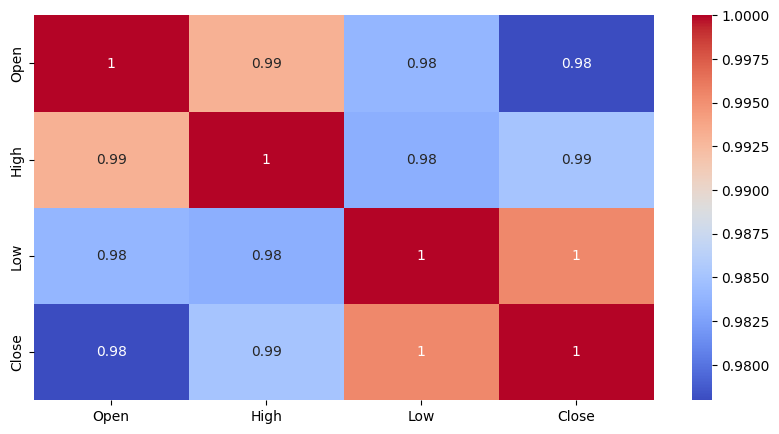

In [154]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,5))
corr=data.corr()
sns.heatmap(corr,cmap='coolwarm',annot=True)

##### 1. Why did you pick the specific chart?

This chart was chosen to visualise the heat map between Close, Open, High, Low prices.



##### 2. What is/are the insight(s) found from the chart?

By understanding the chart we can say that the relation between low and close is the highest, followed by high and close, and least is open and close.



#### Chart - 15 - Pair Plot 

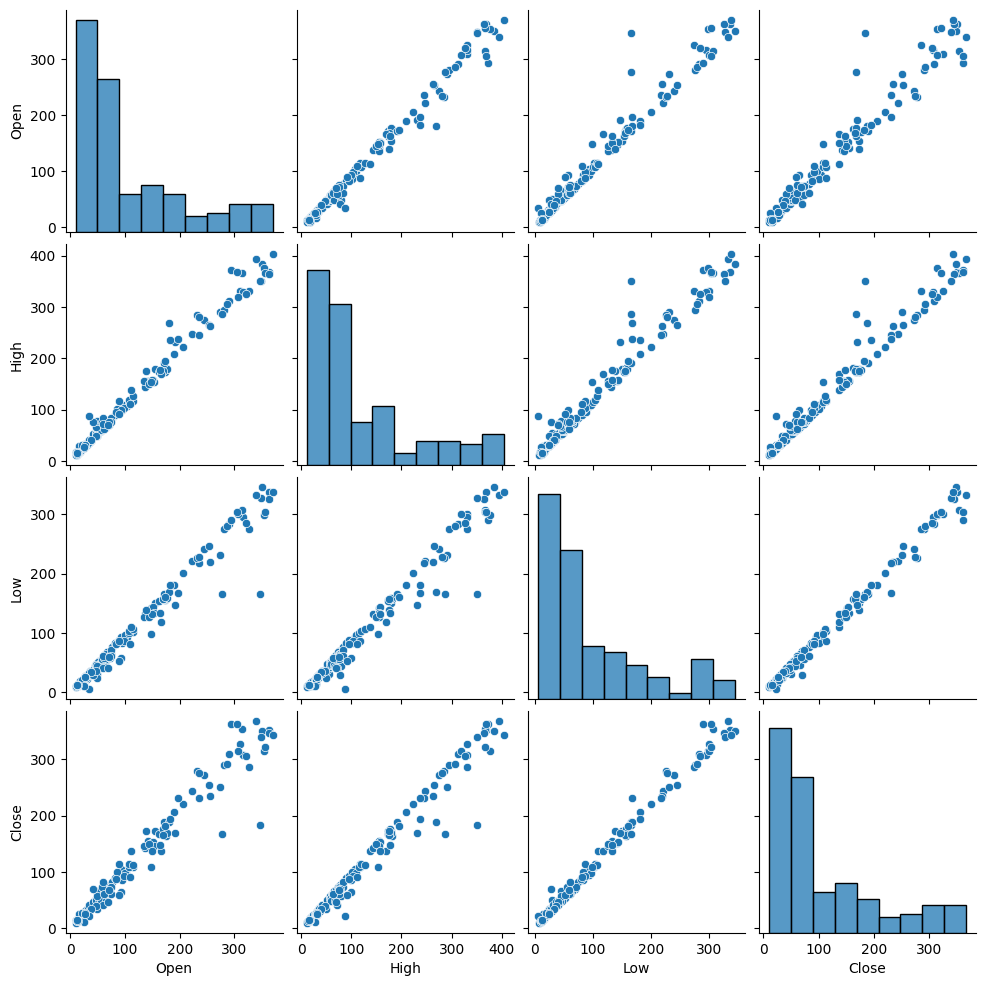

In [155]:
# Pair Plot visualization code
sns.pairplot(data)

##### 1. Why did you pick the specific chart?

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [156]:
# Handling Missing Values & Missing Value Imputation

#No missing values

NO Missing values in dataset

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

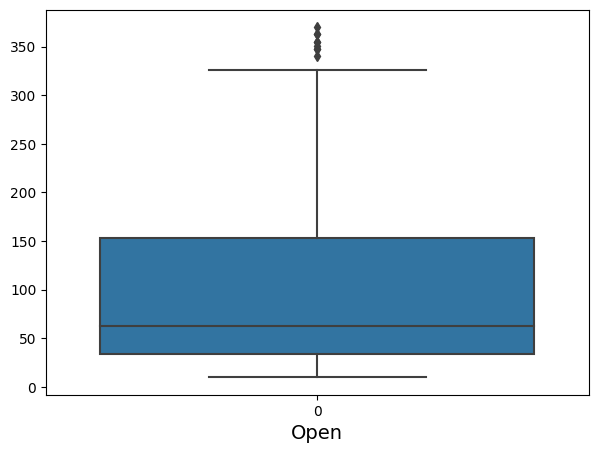

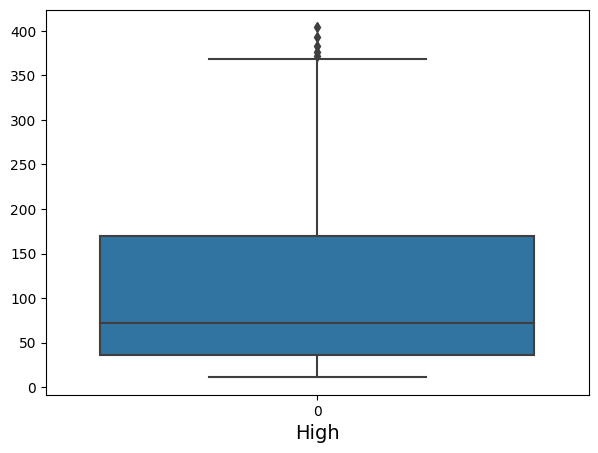

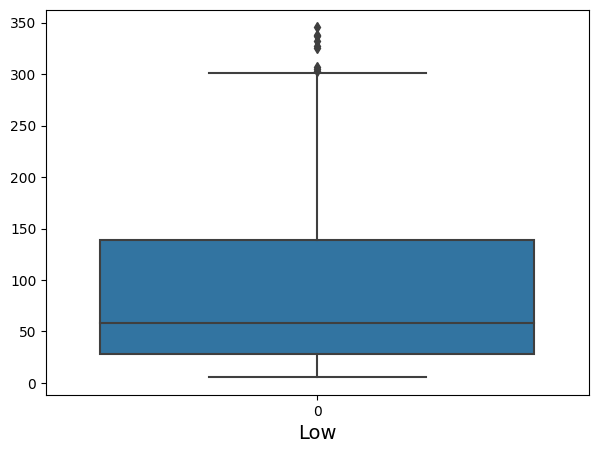

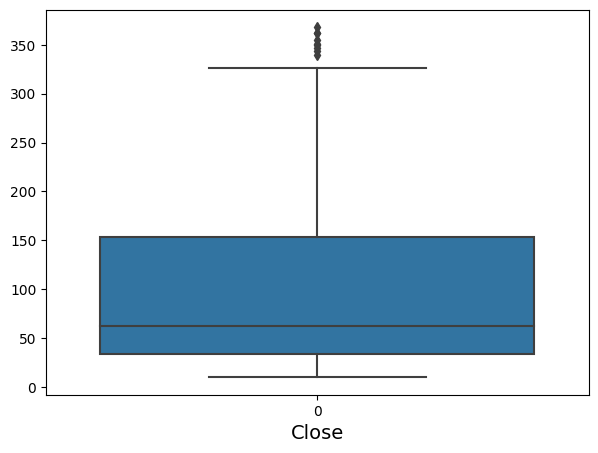

In [157]:
# Handling Outliers & Outlier treatments
# Checking all features for presence of outliers.
for col in data.drop('Date',axis=1):
  plt.figure(figsize=(7,5))
  sns.boxplot(data[col])
  plt.xlabel(col,fontsize=14)
  plt.show()

yes, outlier present in data set .

So, we treat to de-emphasized--

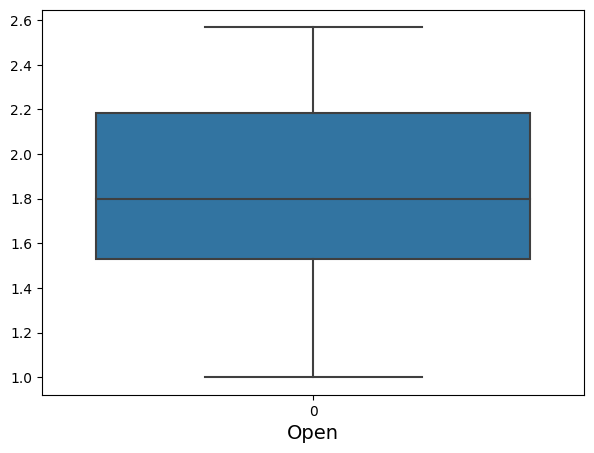

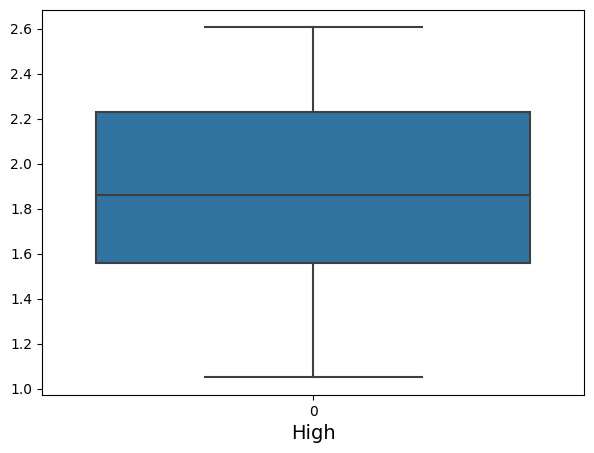

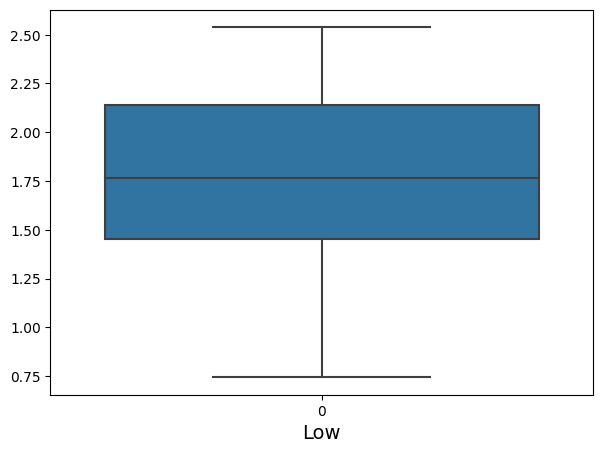

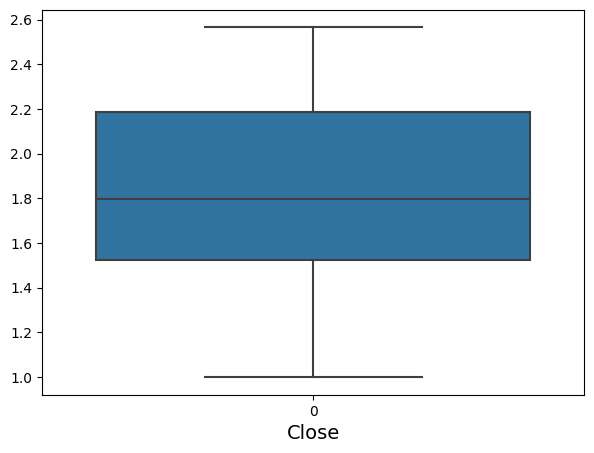

In [158]:
# Treated all features for presence of outliers.
for col in data.drop('Date',axis=1):
  plt.figure(figsize=(7,5))
  sns.boxplot(np.log10(data[col]))
  plt.xlabel(col,fontsize=14)
  plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We used log transformation because Log transformation also de-emphasizes outliers and allows us to potentially obtain a bell-shaped distribution.

### 3. Categorical Encoding

In [159]:
# Encode your categorical columns

#Not needed

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)


**Not Requred because text variable ain't in dataset**

#### 1. Expand Contraction

In [160]:
# Expand Contraction

#### 2. Lower Casing

In [161]:
# Lower Casing

#### 3. Removing Punctuations

In [162]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [163]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [164]:
# Remove Stopwords

In [165]:
# Remove White spaces

#### 6. Rephrase Text

In [166]:
# Rephrase Text

#### 7. Tokenization

In [167]:
# Tokenization

#### 8. Text Normalization

In [168]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [169]:
# POS Taging

#### 10. Text Vectorization

In [170]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [171]:
# Manipulate Features to minimize feature correlation and create new features

# already Manipulated in EDA

#### 2. Feature Selection

In [172]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes,data needs transformation because data have right skewed.

In [173]:
# Transform Your data
x=np.log10(data.drop(columns=['Date','Close'],axis=1))
x

,Open,High,Low
0,1.113943,1.146128,1.051153
1,1.099681,1.172603,1.098644
2,1.129690,1.172311,1.088845
3,1.120574,1.160469,1.093422
4,1.125481,1.142389,1.109916
...,...,...,...
180,1.408240,1.451786,1.045323
181,1.079181,1.234517,1.073718
182,1.155336,1.185825,1.105510
183,1.123852,1.146438,1.083144


In [174]:
y=np.log10(data['Close'])
y

0      1.095518
1      1.127753
2      1.123852
3      1.113609
4      1.127429
         ...   
180    1.077368
181    1.157457
182    1.118926
183    1.094122
184    1.166430
Name: Close, Length: 185, dtype: float64

log base 10 transformation is used because it is  strong transformation over the square and cube root transformation

### 7. Check Multicolinearity

In [175]:
ind_var=data.drop(['Date','Close'],axis=1)

In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(ind_var)


,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


As we can see the values of VIF factor are very high. However since the dataset is so small and has just 3 independent features, multicollinearity is unavoidable here as any feature engineering will lead to loss of information.

Columns are very high multicolinearity

### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [177]:
# DImensionality Reduction (If needed)

#Not needed

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 9. Data Splitting

In [178]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2, random_state=0)
print(xtrain.shape)
print(xtest.shape)

(148, 3)
(37, 3)


##### What data splitting ratio have you used and why? 

I used 20% test data from over all data because 20-80 ratio is better than other.

### 10. Data Scaling

In [179]:
# Scaling your data
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

##### Which method have you used to scale you data and why?

I used min-max scaler because that scales the minimum and maximum values to be 0 and 1 respectively.

### 11. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [180]:
# Handling Imbalanced Dataset (If needed)
#  Not Needed

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 - Linear Regression

In [181]:
# ML Model - 1 Implementation

#object of algorithm's class
reg = LinearRegression()
# Fit the data
model1=reg.fit(xtrain, ytrain)
# Predict on the model


In [182]:
#intercept of model
model1.intercept_

0.8870482548617213

In [183]:
#Co-efficient
model1.coef_

array([-0.85498082,  1.23734697,  1.30428821])

In [184]:
# Model Train Score
model1.score(xtrain, ytrain)

0.9947900553430551

In [185]:
# Model Test Score

reg_score=model1.score(xtest, ytest)
reg_score

0.9956268809883747

In [186]:
#Prediction
test_pred = model1.predict(xtest)
train_pred = model1.predict(xtrain)
test_pred



array([1.4912247 , 2.14465448, 1.67394233, 2.14226908, 1.82201368,
       1.50794844, 2.36203842, 1.21545331, 1.1371433 , 2.35044359,
       2.47496559, 1.94884657, 2.17801307, 1.76486858, 2.52493353,
       2.42732103, 1.86087272, 1.44166154, 2.43034707, 1.70644715,
       0.97157347, 2.07290633, 2.1784174 , 1.76898738, 2.3338384 ,
       1.71921499, 2.40515731, 1.12251144, 2.02871592, 1.72293253,
       2.57183854, 2.55026271, 1.86725537, 2.22192748, 1.59041597,
       1.67502755, 2.41083039])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [187]:
# Train MSE
train_mse = mean_squared_error(ytrain,train_pred)
# Train RMSE
train_rmse = math.sqrt(train_mse)
# Train MAE
train_mae = mean_absolute_error(ytrain,train_pred)
# Train R2 Score
train_r2 = r2_score(ytrain,train_pred)

In [188]:
# Test MSE
test_mse = mean_squared_error(ytest,test_pred)
# Test RMSE
test_rmse = math.sqrt(test_mse)
# Test MAE
test_mae = mean_absolute_error(ytest,test_pred)
# Test R2 Score
test_r2 = r2_score(ytest,test_pred)
# Test Adjusted R2 Score
adjusted_r2=(1-r2_score(10**(ytest), 10**(test_pred)))*((xtest.shape[0]-1)/(xtest.shape[0]-xtest.shape[1]-1))

In [189]:
print("Train MSE :" , train_mse)
print("Train RMSE :" ,train_rmse)
print("Train MAE :" ,train_mae)
print("Train R2 :" ,train_r2)
print("Train Adjusted R2 : ",1-(1-r2_score((ytrain), (train_pred)))*((xtest.shape[0]-1)/(xtest.shape[0]-xtest.shape[1]-1)))
     

Train MSE : 0.0009148333400258225
Train RMSE : 0.03024621199465848
Train MAE : 0.02119499737103512
Train R2 : 0.9947900553430551
Train Adjusted R2 :  0.9943164240106056


In [190]:
print("Test MSE :" , test_mse)
print("Test RMSE :" ,test_rmse)
print("Test MAE :" ,test_mae)
print("Test R2 :" ,test_r2)
print("Test Adjusted R2 : ",1-(1-r2_score((ytest), (test_pred)))*((xtest.shape[0]-1)/(xtest.shape[0]-xtest.shape[1]-1)))


Test MSE : 0.0008146348135191463
Test RMSE : 0.028541808168354478
Test MAE : 0.017328249984231464
Test R2 : 0.9956268809883747
Test Adjusted R2 :  0.9952293247145906


In [191]:
#Actual vs Predicted Values
act_vs_pred=pd.DataFrame({"actual":ytest,"prediction": test_pred})
act_vs_pred

,actual,prediction
33,1.532245,1.491225
125,2.162056,2.144654
173,1.671636,1.673942
112,2.152533,2.142269
61,1.793930,1.822014
18,1.479431,1.507948
137,2.364101,2.362038
7,1.207365,1.215453
5,1.137037,1.137143
162,2.288473,2.350444


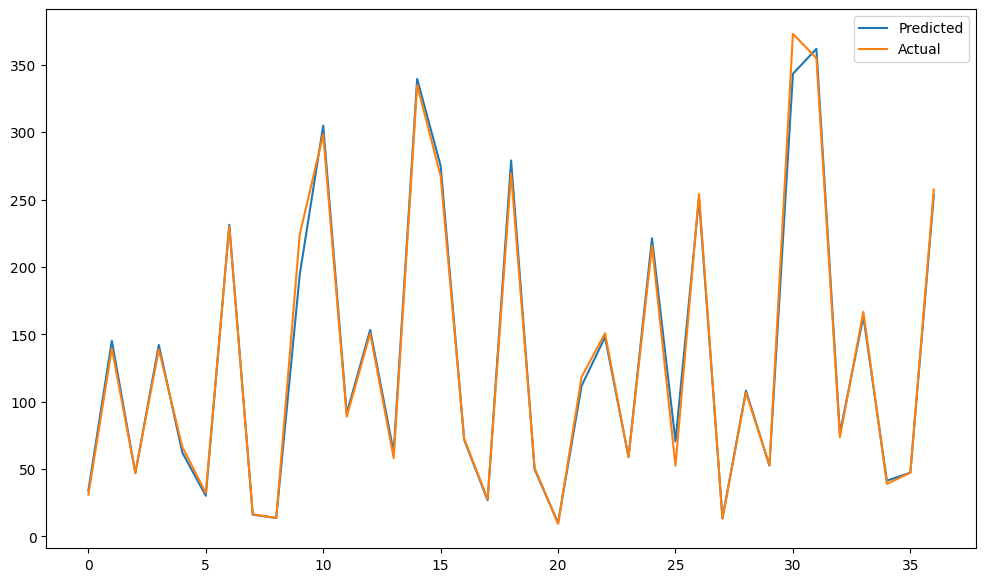

In [192]:
# Visualizing evaluation Metric Score chart
#Plot of  Test Predicted vs Actual Values 

plt.figure(figsize=(12,7 ))
plt.plot(np.array(10**(ytest)))
plt.plot(10**(test_pred))
plt.legend(["Predicted","Actual"])
plt.show()

     

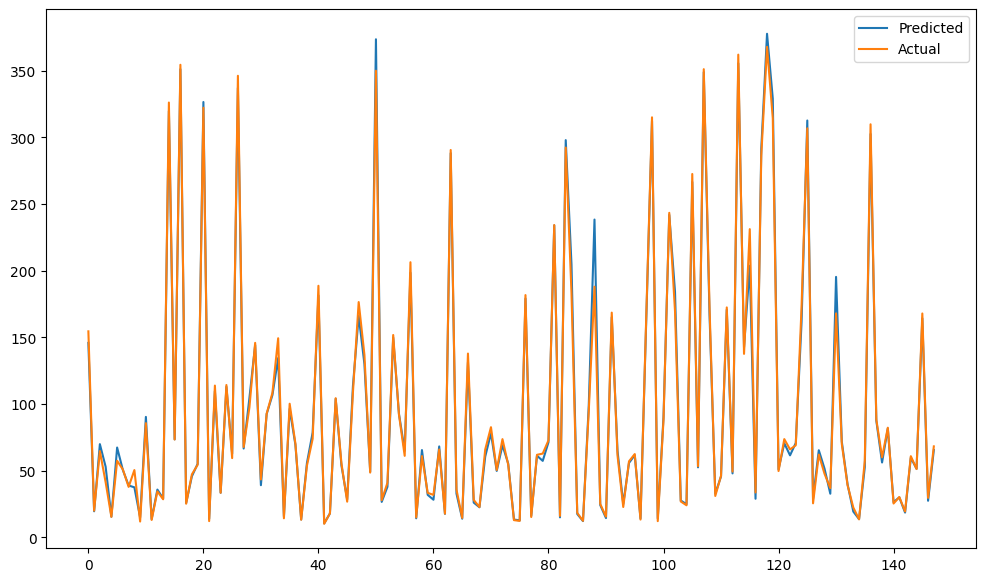

In [193]:
#Plot of  Train Predicted vs Actual Values

plt.figure(figsize=(12,7 ))
plt.plot(10**(train_pred))
plt.plot(np.array(10**(ytrain)))
plt.legend(["Predicted","Actual"])
plt.show()

     

#### 2. Cross- Validation & Hyperparameter Tuning (Grid Search CV)

In [194]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters = {'fit_intercept':[True,False]}

#cv=5 means that 5 folds of our data
cv_regressor = GridSearchCV(reg, parameters, scoring='neg_mean_squared_error', cv=5,refit=True, verbose=1)
# Fit the Algorithm
cv_regressor.fit(xtrain, ytrain)

# Predict on the model

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error', verbose=1)

In [195]:
print('Best estimator',cv_regressor.best_estimator_)
print("\nThe best fit alpha value is found out to be :" ,cv_regressor.best_params_)
print("\nUsing ",cv_regressor.best_params_, " the negative mean squared error is: ", cv_regressor.best_score_)

Best estimator LinearRegression()

The best fit alpha value is found out to be : {'fit_intercept': True}

Using  {'fit_intercept': True}  the negative mean squared error is:  -0.0011557313859509879


In [196]:
# Model Test Score on CV

reg_cv_score=cv_regressor.best_estimator_.score(xtest, ytest)
reg_cv_score

0.9956268809883747

In [197]:
#Prediction On CV 
ypred_cv = cv_regressor.predict(xtest)
ypred_cv

array([1.4912247 , 2.14465448, 1.67394233, 2.14226908, 1.82201368,
       1.50794844, 2.36203842, 1.21545331, 1.1371433 , 2.35044359,
       2.47496559, 1.94884657, 2.17801307, 1.76486858, 2.52493353,
       2.42732103, 1.86087272, 1.44166154, 2.43034707, 1.70644715,
       0.97157347, 2.07290633, 2.1784174 , 1.76898738, 2.3338384 ,
       1.71921499, 2.40515731, 1.12251144, 2.02871592, 1.72293253,
       2.57183854, 2.55026271, 1.86725537, 2.22192748, 1.59041597,
       1.67502755, 2.41083039])

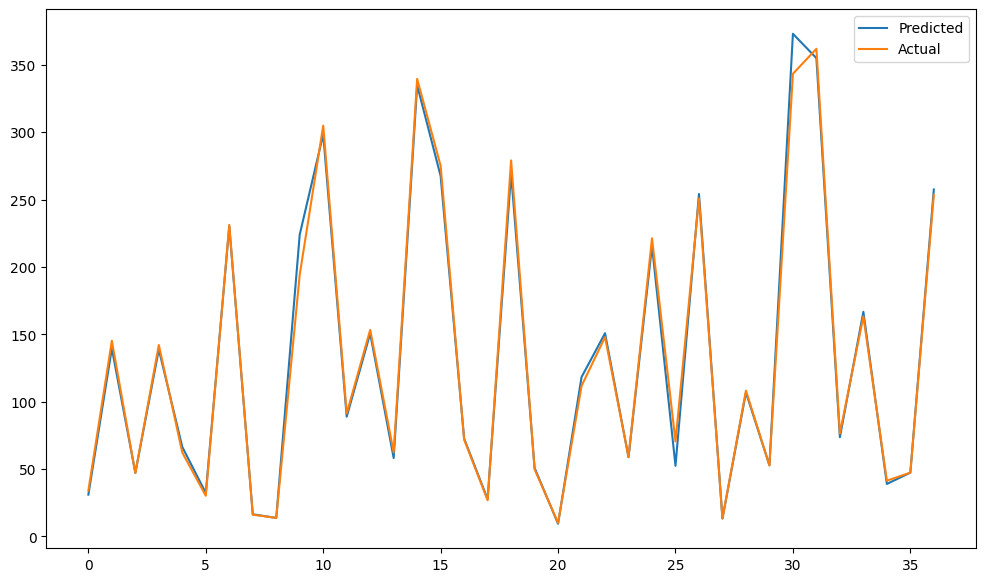

In [198]:
#Plot of  Test Predicted vs Actual Values On CV

plt.figure(figsize=(12,7))
plt.plot(10**(ypred_cv))
plt.plot(10**(np.array(ytest)))
plt.legend(["Predicted","Actual"])
plt.show()

In [199]:
# Test MSE on CV
cv_test_mse = mean_squared_error(ytest,ypred_cv)
# Test RMSE on CV
cv_test_rmse = math.sqrt(cv_test_mse)
# Test MAE on CV
cv_test_mae = mean_absolute_error(ytest,ypred_cv)
# Test R2 Score on CV
cv_test_r2 = r2_score(ytest,ypred_cv)


In [200]:
print("GridSearchCV Test MSE :" , cv_test_mse)
print("GridSearchCV Test RMSE :" ,cv_test_rmse)
print("GridSearchCV Test MAE :" ,cv_test_mae)
print("GridSearchCV Test R2 :" ,cv_test_r2)
print("GridSearchCV Test Adjusted R2 : ",1-(1-r2_score((ytest), (ypred_cv)))*((xtest.shape[0]-1)/(xtest.shape[0]-xtest.shape[1]-1)))

GridSearchCV Test MSE : 0.0008146348135191463
GridSearchCV Test RMSE : 0.028541808168354478
GridSearchCV Test MAE : 0.017328249984231464
GridSearchCV Test R2 : 0.9956268809883747
GridSearchCV Test Adjusted R2 :  0.9952293247145906


##### Which hyperparameter optimization technique have you used and why?

I used Grid Search CV optimization technique because GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

/ Linear Regression ->

    Train Score - 0.9947900553430551
    Test R2 Score - 0.9956268809883747

    Test MSE : 0.0008146348135191463
    Test RMSE : 0.028541808168354478
    Test MAE : 0.017328249984231464
    Test R2 : 0.9956268809883747
    Test Adjusted R2 :  0.9952293247145906


Grid Search CV on regression - >
```
Linear Regression R2 test Score on CV - 0.9956268809883747


GridSearchCV Test MSE : 0.0008146348135191463
GridSearchCV Test RMSE : 0.028541808168354478
GridSearchCV Test MAE : 0.017328249984231464
GridSearchCV Test R2 : 0.9956268809883747
GridSearchCV Test Adjusted R2 :  0.9952293247145906


```





### ML Model - 2 - Lasso Model

In [201]:
# ML Model - 2 Implementation
lasso  = Lasso(alpha=0.01 , max_iter= 3000)
# Fit the Algorithm
lasso.fit(xtrain, ytrain)


# Predict on the model

Lasso(alpha=0.01, max_iter=3000)

In [202]:
# Test and Train Score
lasso.score(xtrain, ytrain)
lasso_score=lasso.score(xtest, ytest)
lasso_score

0.9853501442804457

In [203]:
# prediction on x_test
lasso_pred=lasso.predict(xtest)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [204]:
# Test MSE
l_test_mse = mean_squared_error(ytest,lasso_pred)
# Test RMSE
l_test_rmse = math.sqrt(l_test_mse)
# Test MAE
l_test_mae = mean_absolute_error(ytest,lasso_pred)
# Test R2 score
l_test_r2 = r2_score(ytest,lasso_pred)

In [205]:
print("Lasso Test MSE :" , l_test_mse)
print("Lasso Test RMSE :" ,l_test_rmse)
print("Lasso Test MAE :" ,l_test_mae)
print("Lasso Test R2 :" ,  l_test_r2)
print("Lasso Test Adjusted R2 : ",1-(1-r2_score((ytest), (lasso_pred)))*((xtest.shape[0]-1)/(xtest.shape[0]-xtest.shape[1]-1)))

Lasso Test MSE : 0.0027290093067341534
Lasso Test RMSE : 0.052239920623352344
Lasso Test MAE : 0.04263502496163316
Lasso Test R2 : 0.9853501442804457
Lasso Test Adjusted R2 :  0.9840183392150316


In [206]:
#Actual Vs Predict Values 
act_vs_pred=pd.DataFrame({"actual":ytest,"prediction": lasso_pred})
act_vs_pred

,actual,prediction
33,1.532245,1.529765
125,2.162056,2.122649
173,1.671636,1.745940
112,2.152533,2.104481
61,1.793930,1.800916
18,1.479431,1.509963
137,2.364101,2.309988
7,1.207365,1.255247
5,1.137037,1.189988
162,2.288473,2.271246


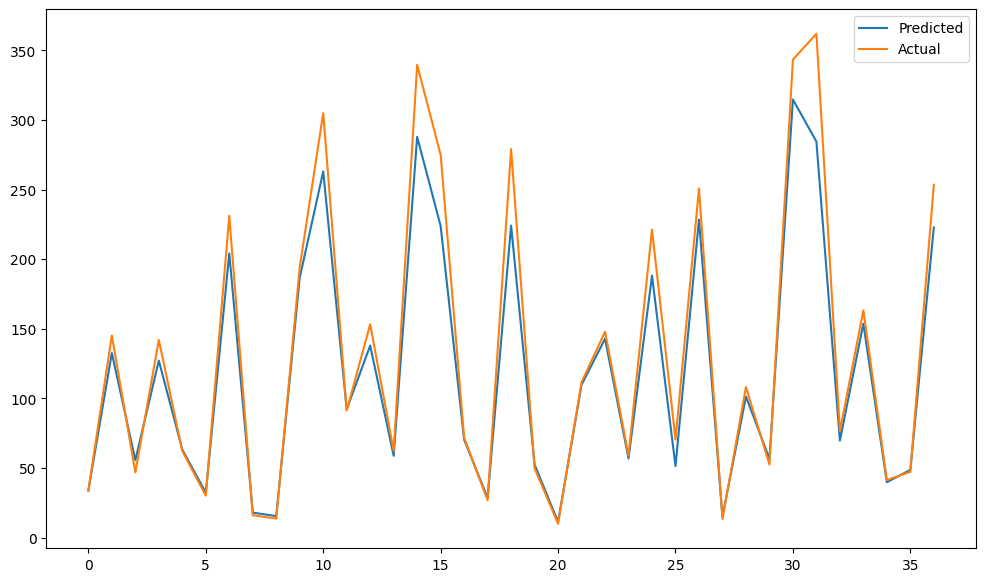

In [207]:
# Visualizing evaluation Metric Score chart
#Visualizing Actual vs predict  Values

plt.figure(figsize=(12,7))
plt.plot(10**(lasso_pred))
plt.plot(10**(np.array(ytest)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning (Random Search CV)

In [208]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso=Lasso()
param={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]
       }
random_cv=RandomizedSearchCV(estimator=lasso,param_distributions=param,scoring='neg_mean_squared_error', cv=5,refit=True, verbose=3)
# Fit the Algorithm
random_cv.fit(xtrain,ytrain)
# Predict on the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .........................alpha=45;, score=-0.175 total time=   0.0s
[CV 2/5] END .........................alpha=45;, score=-0.150 total time=   0.0s
[CV 3/5] END .........................alpha=45;, score=-0.200 total time=   0.0s
[CV 4/5] END .........................alpha=45;, score=-0.244 total time=   0.0s
[CV 5/5] END .........................alpha=45;, score=-0.124 total time=   0.0s
[CV 1/5] END .........................alpha=30;, score=-0.175 total time=   0.0s
[CV 2/5] END .........................alpha=30;, score=-0.150 total time=   0.0s
[CV 3/5] END .........................alpha=30;, score=-0.200 total time=   0.0s
[CV 4/5] END .........................alpha=30;, score=-0.244 total time=   0.0s
[CV 5/5] END .........................alpha=30;, score=-0.124 total time=   0.0s
[CV 1/5] END ......................alpha=0.001;, score=-0.003 total time=   0.0s
[CV 2/5] END ......................alpha=0.001;,

RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': [1e-15, 1e-13, 1e-10, 1e-08,
                                                  1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 1, 5, 10, 20, 30, 40, 45,
                                                  50, 55, 60, 100]},
                   scoring='neg_mean_squared_error', verbose=3)

In [209]:
print("The best fit alpha value is found out to be :" ,random_cv.best_params_)
print("\nUsing ",random_cv.best_params_, " the negative mean squared error is: ", random_cv.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.0011557335454165205


In [210]:
# Lasso Model Test Score on CV

lasso_cv_score=random_cv.best_estimator_.score(xtest, ytest)
lasso_cv_score

0.9956268750159998

In [211]:
#prediction on x_test
rand_cv_pred=random_cv.predict(xtest)
rand_cv_pred

array([1.49122479, 2.14465458, 1.67394263, 2.14226908, 1.82201359,
       1.50794829, 2.36203845, 1.21545329, 1.13714331, 2.35044338,
       2.47496566, 1.94884674, 2.17801309, 1.76486863, 2.52493358,
       2.4273209 , 1.86087272, 1.44166146, 2.43034692, 1.7064472 ,
       0.97157353, 2.0729063 , 2.17841746, 1.76898731, 2.33383837,
       1.71921465, 2.40515737, 1.12251149, 2.02871595, 1.72293268,
       2.57183852, 2.55026252, 1.86725528, 2.22192753, 1.59041594,
       1.67502759, 2.41083039])

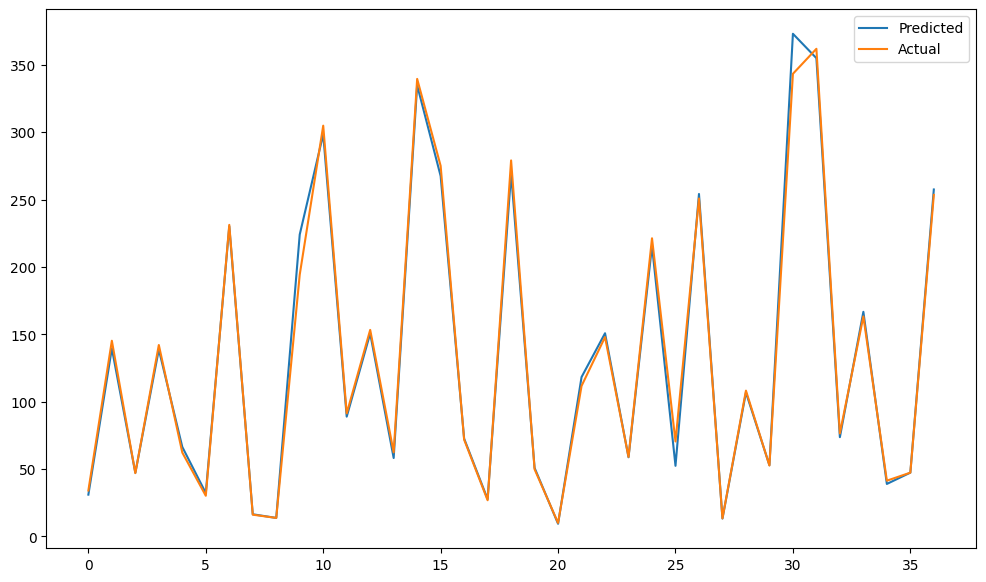

In [212]:
#Visualizing Actual vs Predicted Values
plt.figure(figsize=(12,7))
plt.plot(10**(rand_cv_pred))
plt.plot(10**(np.array(ytest)))
plt.legend(["Predicted","Actual"])
plt.show()

In [213]:
# Lasso Test MSE on CV 
randomcv_test_mse = mean_squared_error(ytest,rand_cv_pred)
# Lasso Test RMSE on CV 
randomcv_test_rmse = math.sqrt(randomcv_test_mse)
# Lasso Test MAE on CV 
randomcv_test_mae = mean_absolute_error(ytest,rand_cv_pred)
# Lasso Test R2 Score on CV 
randomcv_test_r2 = r2_score(ytest,rand_cv_pred)


In [214]:
print("RandomsearchCV Test MSE :" , randomcv_test_mse)
print("RandomsearchCV Test RMSE :" ,randomcv_test_rmse)
print("RandomsearchCV Test MAE :" ,randomcv_test_mae)
print("RandomsearchCV Test R2 :" ,  randomcv_test_r2)
print("RandomsearchCV Adjusted R2 : ",1-(1-r2_score((ytest), (rand_cv_pred)))*((xtest.shape[0]-1)/(xtest.shape[0]-xtest.shape[1]-1)))

RandomsearchCV Test MSE : 0.00081463592606708
RandomsearchCV Test RMSE : 0.028541827658142005
RandomsearchCV Test MAE : 0.017328260197782844
RandomsearchCV Test R2 : 0.9956268750159998
RandomsearchCV Adjusted R2 :  0.9952293181992725


##### Which hyperparameter optimization technique have you used and why?

I used Random Search CV because RandomizedSearchCV randomly passes the set of hyperparameters and calculate the score and gives the best set of hyperparameters which gives the best score as an output

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Lasso -

```
Lasso test R2 Score - 0.9853501442804457

Lasso Test MSE : 0.0027290093067341534
Lasso Test RMSE : 0.052239920623352344
Lasso Test MAE : 0.04263502496163316
Lasso Test R2 : 0.9853501442804457
Lasso Test Adjusted R2 :  0.9840183392150316
```
Random Search CV on Lasso -


```
Lasso test R2 Score on CV - 0.9956268750155841

RandomsearchCV Test MSE : 0.0008234530112057627
RandomsearchCV Test RMSE : 0.028695870978343953
RandomsearchCV Test MAE : 0.017418119092713846
RandomsearchCV Test R2 : 0.9955795431784608
RandomsearchCV Adjusted R2 :  0.9951776834674118
```


Random Search cv r2 score and adjusted r2 score increase over the lassso r2 score and adjusted r2 score.

All Error(mse,rmse) decreased over it.

### ML Model - 3 - Elastic Net Model

In [215]:
# ML Model - 3 Implementation
elastic  = ElasticNet(alpha=0.01,l1_ratio=0.5)
# Fit the Algorithm
elastic.fit(xtrain, ytrain)

# Predict on the model

ElasticNet(alpha=0.01)

In [216]:
#Elastic Model score
elastic.score(xtrain, ytrain)
elastic_score=elastic.score(xtest, ytest)
elastic_score

0.9856949576309396

In [217]:
#Model Prediction on x_test
elastic_pred=elastic.predict(xtest)
elastic_pred

array([1.53127865, 2.13803071, 1.76592251, 2.11340697, 1.79483274,
       1.49244608, 2.32464937, 1.24384611, 1.1801501 , 2.26478286,
       2.43998977, 1.98146114, 2.15066806, 1.77389334, 2.47925152,
       2.35180412, 1.84987427, 1.44427658, 2.35063668, 1.72283355,
       1.04386932, 2.04468503, 2.16634728, 1.74966012, 2.28413653,
       1.67418365, 2.37523873, 1.17166302, 2.01379965, 1.76470529,
       2.51242327, 2.45264968, 1.83764509, 2.20002846, 1.59526665,
       1.69007091, 2.36162972])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [218]:
# Elastic net MSE
elastic_mse = mean_squared_error(ytest,elastic_pred)
# Elastic net RMSE
elastic_rmse = math.sqrt(elastic_mse)
# Elastic net MAE
elastic_mae = mean_absolute_error(ytest,elastic_pred)
# Elastic net R2 Score
elastic_r2 = r2_score(ytest,elastic_pred)

In [219]:
print("ElasticNet Test MSE :" , elastic_mse)
print("ElasticNet Test RMSE :" ,elastic_rmse)
print("ElasticNet Test MAE :" ,elastic_mae)
print("ElasticNet Test R2 :" ,  elastic_r2)
print("ElasticNet Test Adjusted R2 :" ,  1-(1-r2_score((ytest), (elastic_pred)))*((xtest.shape[0]-1)/(xtest.shape[0]-xtest.shape[1]-1)))

ElasticNet Test MSE : 0.002664776671232623
ElasticNet Test RMSE : 0.05162147490369316
ElasticNet Test MAE : 0.038518841723734
ElasticNet Test R2 : 0.9856949576309396
ElasticNet Test Adjusted R2 : 0.9843944992337523


In [220]:
# Actual Vs Predicted Values
act_vs_pred=pd.DataFrame({"actual":ytest,"prediction": elastic_pred})
act_vs_pred

,actual,prediction
33,1.532245,1.531279
125,2.162056,2.138031
173,1.671636,1.765923
112,2.152533,2.113407
61,1.793930,1.794833
18,1.479431,1.492446
137,2.364101,2.324649
7,1.207365,1.243846
5,1.137037,1.180150
162,2.288473,2.264783


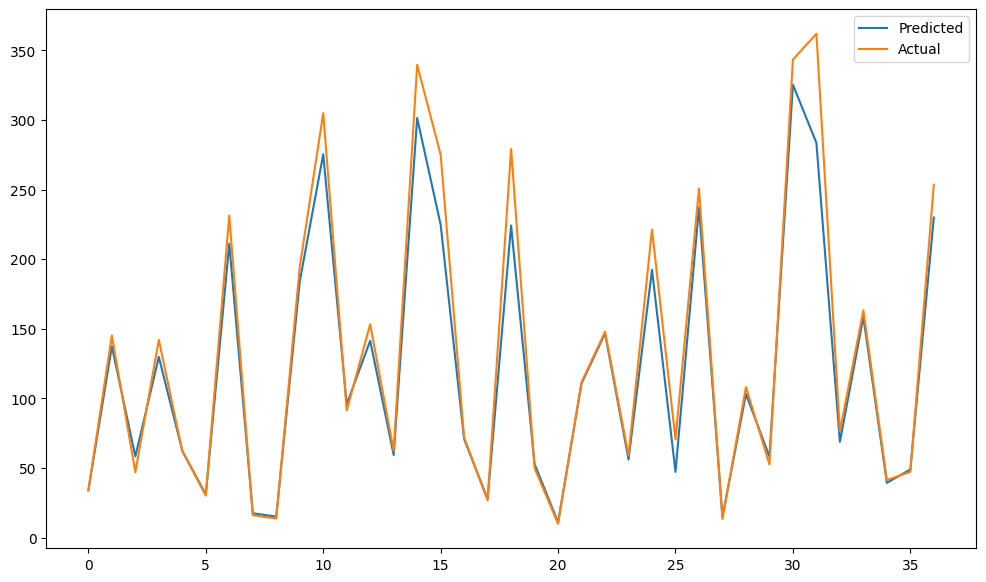

In [221]:
# Visualizing evaluation Metric Score chart
#Elastic net prediction Visualization

plt.figure(figsize=(12,7))
plt.plot(10**(elastic_pred))
plt.plot(10**(np.array(ytest)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning (Grid Search CV)

In [222]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
elastic=ElasticNet()
param = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}

gridcv_elastic=GridSearchCV(estimator=elastic,param_grid=param,scoring='neg_mean_squared_error', cv=5,refit=True, verbose=3)
# Fit the Algorithm
gridcv_elastic.fit(xtrain,ytrain)

# Predict on the model

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END ........alpha=1e-15, l1_ratio=0.3;, score=-0.002 total time=   0.0s
[CV 2/5] END ........alpha=1e-15, l1_ratio=0.3;, score=-0.001 total time=   0.0s
[CV 3/5] END ........alpha=1e-15, l1_ratio=0.3;, score=-0.001 total time=   0.0s
[CV 4/5] END ........alpha=1e-15, l1_ratio=0.3;, score=-0.001 total time=   0.0s
[CV 5/5] END ........alpha=1e-15, l1_ratio=0.3;, score=-0.002 total time=   0.0s
[CV 1/5] END ........alpha=1e-15, l1_ratio=0.4;, score=-0.002 total time=   0.0s
[CV 2/5] END ........alpha=1e-15, l1_ratio=0.4;, score=-0.001 total time=   0.0s
[CV 3/5] END ........alpha=1e-15, l1_ratio=0.4;, score=-0.001 total time=   0.0s
[CV 4/5] END ........alpha=1e-15, l1_ratio=0.4;, score=-0.001 total time=   0.0s
[CV 5/5] END ........alpha=1e-15, l1_ratio=0.4;, score=-0.002 total time=   0.0s
[CV 1/5] END ........alpha=1e-15, l1_ratio=0.5;, score=-0.002 total time=   0.0s
[CV 2/5] END ........alpha=1e-15, l1_ratio=0.5

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error', verbose=3)

In [223]:
print("The best fit alpha value is found out to be :" ,gridcv_elastic.best_params_)
print("\nUsing ",gridcv_elastic.best_params_, " the negative mean squared error is: ", gridcv_elastic.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05, 'l1_ratio': 0.3}

Using  {'alpha': 1e-05, 'l1_ratio': 0.3}  the negative mean squared error is:  -0.0011508884805071253


In [224]:
# Elastic net Model Test Score on CV

elastic_cv_score=gridcv_elastic.best_estimator_.score(xtest, ytest)
elastic_cv_score

0.995581499468176

In [225]:
# Prediction on xtest 
elasticcv_pred = gridcv_elastic.predict(xtest)
elasticcv_pred

array([1.49181825, 2.14517656, 1.67565372, 2.1423155 , 1.82151406,
       1.50715174, 2.36215358, 1.21552669, 1.13745617, 2.34910111,
       2.47528624, 1.94983415, 2.17813828, 1.76521118, 2.52515598,
       2.42643777, 1.86090899, 1.44132837, 2.42933071, 1.7067854 ,
       0.97206172, 2.07273912, 2.17863807, 1.7686288 , 2.33361792,
       1.71691503, 2.40536402, 1.12300188, 2.0288737 , 1.72388406,
       2.57162192, 2.54894837, 1.8667158 , 2.22217369, 1.59035703,
       1.67538975, 2.41077703])

In [226]:
#Elastic net MSE on CV
elasticcv_mse = mean_squared_error(ytest,elasticcv_pred)
#Elastic net RMSE on CV
elasticcv_rmse = math.sqrt(elasticcv_mse)
#Elastic net MAE on CV
elasticcv_mae = mean_absolute_error(ytest,elasticcv_pred)
#Elastic net R2_Score on CV
elasticcv_r2 = r2_score(ytest,elasticcv_pred)

In [227]:
print("Elastic_gridScv Test MSE :" , elasticcv_mse)
print("Elastic_gridScv Test RMSE :" ,elasticcv_rmse)
print("Elastic_gridScv Test MAE :" ,elasticcv_mae)
print("Elastic_gridScv Test R2 :" ,  elasticcv_r2)
print("Elastic_gridScv Test Adjusted R2 :" ,1-(1-r2_score((ytest), (elasticcv_pred)))*((xtest.shape[0]-1)/(xtest.shape[0]-xtest.shape[1]-1)))

Elastic_gridScv Test MSE : 0.0008230885889928928
Elastic_gridScv Test RMSE : 0.02868952054309888
Elastic_gridScv Test MAE : 0.017417310916422978
Elastic_gridScv Test R2 : 0.995581499468176
Elastic_gridScv Test Adjusted R2 : 0.9951798176016465


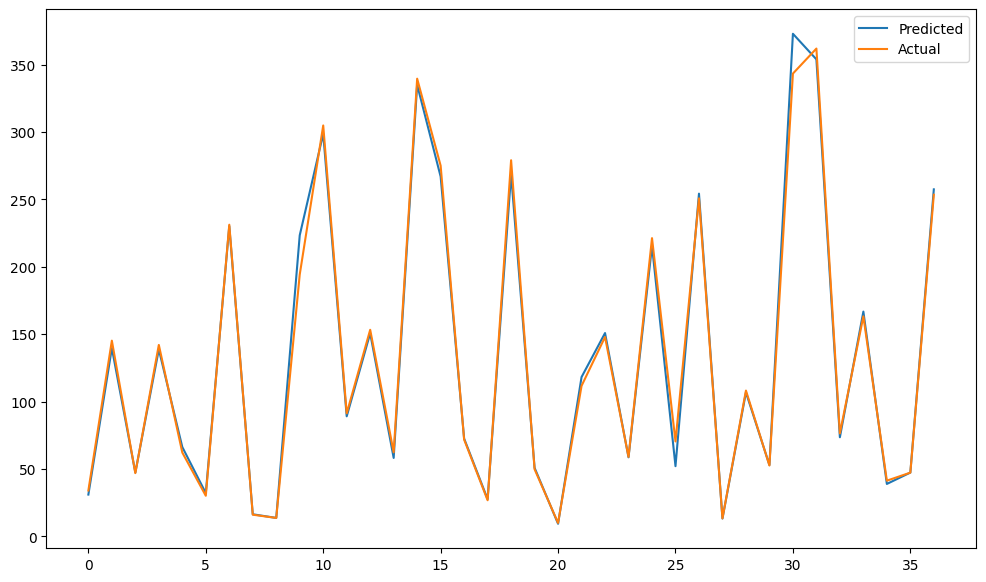

In [228]:
# Visualizing evaluation Metric Score chart
#Elastic net prediction on CV Visualization

plt.figure(figsize=(12,7))
plt.plot(10**(elasticcv_pred))
plt.plot(10**(np.array(ytest)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used Grid Search CV optimization technique because GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Elastic Net -

```
Elastic net test R2 Score - 0.9856949576309396

ElasticNet Test MSE : 0.002664776671232623
ElasticNet Test RMSE : 0.05162147490369316
ElasticNet Test MAE : 0.038518841723734
ElasticNet Test R2 : 0.9856949576309396
ElasticNet Test Adjusted R2 : 0.9843944992337523

```
Grid Search CV on Elastic Net -


```
Elastic net test R2 Score on CV - 0.995581499468176

Elastic_gridScv Test MSE : 0.0008230885889928928
Elastic_gridScv Test RMSE : 0.02868952054309888
Elastic_gridScv Test MAE : 0.017417310916422978
Elastic_gridScv Test R2 : 0.995581499468176
Elastic_gridScv Test Adjusted R2 : 0.9951798176016465

```


Grid search cv r2 score and adjusted r2 score increase over the Elastic net r2 score and adjusted r2 score.

### Compare all model

In [229]:
# a dataframe to compare all the models
models_df = pd.DataFrame(
    {'Models': ['Linear Regression','Lasso','ElasticNet','Linear Regression on CV','Lasso Regression on CV','ElasticNet on CV'],
     'Score': [reg_score, lasso_score, elastic_score,reg_cv_score,lasso_cv_score,elastic_cv_score],
    })
models_df.sort_values(by=['Score'], ascending=False, inplace=True)
models_df

,Models,Score
0,Linear Regression,0.995627
3,Linear Regression on CV,0.995627
4,Lasso Regression on CV,0.995627
5,ElasticNet on CV,0.995581
2,ElasticNet,0.985695
1,Lasso,0.985350


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Score** is best evaluation metric to business impact because

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Linear Reagression is the best model his score is 99.5% with and without Hyper parameter Tunning Technique.




### 3. Explain the model which you have used and the feature importance using any model explainability tool?

We used many features of Models -:

Mean Squared Error(MSE)->


```
Mean Squared Error (MSE) is defined as Mean or Average of the square of the difference between actual and estimated values.

                MSE = 1/n .[y-y_predicted]square

```

Root Mean Squared Error(RMSE)->


```
Root of mean squared error.

                RMSE = root(1/n .[y-y_predicted]square)
```

R-square Score (R2)->


```
The R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points.

              R2 Score=1− (MSE model/MSE Baseline)

```

Adjusted R-square Score (Adjusted R2)->


```
Adjusted R squared is calculated by dividing the residual mean square error by the total mean square error.

```


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [230]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [231]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Our project's conclusion Points are that ->

1.   Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.


2.   After loading the dataset, we found that there are no null values in our dataset nor any duplicate data.


3.   There are some outliers in our features however this being a very small  dataset, dropping those instances will lead to loss of information.


4.   We found that the distribution of all our variables is positively skewed. so we performed log transformation on them.


5.   There is a high correlation between the dependent and independent variables. This is a signal that our dependent variable is highly dependent on our features and can be predicted accurately from them.


6.   We found that there is a rather high correlation between our independent variables. This multicollinearity is however unavoidable here as the dataset is very small.

7.   We implemented several models on our dataset in order to be able to predict the closing price and found that all our models are performing remarkably well and Linear Regressor is the best performing model which R2 score value of 99.5% .

8.   All of the implemented models on Cross-Validation and Hyperparameter Technique performed quite well on our data giving us the R2 Score of over 99%.
   

9.   With our model making predictions with such high accuracy, we can confidently deploy this model for further predictive tasks using future data.






### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***